In [13]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
ndf = pd.read_csv("Thyroid.csv", names =["TSH", "T3", "TT4", "T4U", "FTI", "TBG", "Class"])
ndf.head()

,TSH,T3,TT4,T4U,FTI,TBG,Class
0,0.73,0.00060,0.015,0.120,0.082,0.146,0
1,0.24,0.00025,0.030,0.143,0.133,0.108,0
2,0.47,0.00190,0.024,0.102,0.131,0.078,0
3,0.64,0.00090,0.017,0.077,0.090,0.085,0
4,0.23,0.00025,0.026,0.139,0.090,0.153,0


In [3]:
ndf["Class"].groupby(ndf["Class"]).count()

Class
0    6666
1     534
Name: Class, dtype: int64

In [4]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [5]:
X = ndf.values[:, :6]
X

array([[  7.30000000e-01,   6.00000000e-04,   1.50000000e-02,
          1.20000000e-01,   8.20000000e-02,   1.46000000e-01],
       [  2.40000000e-01,   2.50000000e-04,   3.00000000e-02,
          1.43000000e-01,   1.33000000e-01,   1.08000000e-01],
       [  4.70000000e-01,   1.90000000e-03,   2.40000000e-02,
          1.02000000e-01,   1.31000000e-01,   7.80000000e-02],
       ..., 
       [  5.10000000e-01,   7.60000000e-04,   2.01000000e-02,
          9.00000000e-02,   6.70000000e-02,   1.34000000e-01],
       [  3.50000000e-01,   2.80000000e-03,   2.01000000e-02,
          9.00000000e-02,   8.90000000e-02,   1.01000000e-01],
       [  7.30000000e-01,   5.60000000e-04,   2.01000000e-02,
          8.10000000e-02,   9.00000000e-02,   9.00000000e-02]])

In [6]:
Y = ndf.values[:, 6]
Y

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [7]:
Y = Y.astype(int)

In [8]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

In [11]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix
# print(recall_score(Y, labels, pos_label=1))
# print(precision_score(Y, labels, pos_label=1))
# print(confusion_matrix(Y, labels))

In [9]:
# K-means
from sklearn import metrics
from sklearn.cluster import KMeans

In [10]:
X.shape

(7200, 6)

In [12]:
from time import time
import sys
start_time = time()
kmeans = KMeans(n_clusters=2, random_state=8).fit(X)
end_time = time()
time_spend = end_time-start_time
time_spend

0.15587306022644043

In [27]:
from collections import Counter
k = 3
kmeans_n = KMeans(n_clusters=k, random_state=1).fit(X)
end_time = time()
time_spend = end_time-start_time
y_pred = kmeans_n.predict(X)
clusters = dict.fromkeys([i for i in range(k)], None)
for i in range(len(clusters)):
    clusters[i] = []
for label in range(len(y_pred)):
    clusters[y_pred[label]].append(label)

categories = {}
for i in range(k):
    categories[i] = [Y[m] for m in clusters.get(i)]
for d in range(len(categories)):
    print("Cluster %r: %r\n" % (d, Counter(categories[d])))

Cluster 0: Counter({0: 2103, 1: 185})

Cluster 1: Counter({0: 2172, 1: 132})

Cluster 2: Counter({0: 2391, 1: 217})



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import copy
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, DBSCAN
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.preprocessing import normalize
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler, scale
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)

In [40]:
start = time()
lof = LocalOutlierFactor(n_neighbors=500, metric="euclidean", contamination=0.1, n_jobs=-1)
y_pred = lof.fit_predict(X)
end = time()
print(end - start)
np.place(y_pred, y_pred==-1, 0)
print(Counter(y_pred))
print(confusion_matrix(Y, y_pred))
print(recall_score(Y, y_pred, pos_label=1))
print(precision_score(Y, y_pred, pos_label=1))

0.699782133102417
Counter({1: 6480, 0: 720})
[[ 562 6104]
 [ 158  376]]
0.704119850187
0.058024691358


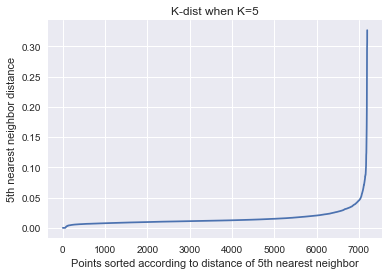

In [62]:
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)
dist = distances[:, k-1]
dist.sort()
plt.title("K-dist when K=%r" % k)
plt.xlabel("Points sorted according to distance of %rth nearest neighbor" %k)
plt.ylabel("%rth nearest neighbor distance" %k)
plt.plot(np.arange(0, len(dist)), dist)

Counter({-1: 509, 0: 6691})

In [67]:
start = time.time()
dbs = DBSCAN(eps=0.06, min_samples=5, n_jobs=-1)
y_pred = dbs.fit_predict(X)
end = time.time()
print(end - start)
print(Counter(y_pred))
clusters = dict.fromkeys([i for i in range(k)], None)
for i in set(y_pred):
    clusters[i] = []
for label in range(len(y_pred)):
    clusters[y_pred[label]].append(label)

categories = {}
for i in set(y_pred):
    categories[i] = [Y[m] for m in clusters.get(i)]
for d in range(-1, len(categories) - 1):
    print("Cluster %r: %r\n" % (d, Counter(categories[d])))

0.4028012752532959
Counter({0: 7118, -1: 77, 1: 5})
Cluster -1: Counter({0: 46, 1: 31})

Cluster 0: Counter({0: 6620, 1: 498})

Cluster 1: Counter({1: 5})



In [15]:
from collections import Counter
kmeans_n = KMeans(n_clusters=4, random_state=1).fit(X)
end_time = time()
time_spend = end_time-start_time
Counter(kmeans_n.labels_)

Counter({0: 2208, 1: 1724, 2: 1905, 3: 1363})

In [ ]:
from collections import Counter
kmeans_n = KMeans(n_clusters=5, random_state=1).fit(X)
end_time = time()
time_spend = end_time-start_time
Counter(kmeans_n.labels_)

In [ ]:
from collections import Counter
kmeans_n = KMeans(n_clusters=6, random_state=1).fit(X)
end_time = time()
time_spend = end_time-start_time
Counter(kmeans_n.labels_)

In [ ]:
confusion_matrix(Y, kmeans_3.labels_)

In [ ]:
list(Y).count(0)

In [ ]:
print(list(kmeans.labels_).count(1))
print(list(kmeans.labels_).count(0))

In [ ]:
print(list(kmeans_3.labels_).count(2))
print(list(kmeans_3.labels_).count(1))
print(list(kmeans_3.labels_).count(0))

In [ ]:
print(list(kmeans_4.labels_).count(3))
print(list(kmeans_4.labels_).count(2))
print(list(kmeans_4.labels_).count(1))
print(list(kmeans_4.labels_).count(0))


In [ ]:
# K=2
from sklearn.metrics import recall_score, precision_score, confusion_matrix
print(recall_score(Y, kmeans.labels_, pos_label=1))
print(precision_score(Y, kmeans.labels_, pos_label=1))
print(confusion_matrix(Y, kmeans.labels_))

In [ ]:
# K=3
from sklearn.metrics import recall_score, precision_score, confusion_matrix
print(recall_score(Y, kmeans.labels_, pos_label=1))
print(precision_score(Y, kmeans.labels_, pos_label=1))
print(confusion_matrix(Y, kmeans.labels_))

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#SSE
sses = []
for k in range(2, 11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sses.append(km.inertia_)
plt.plot(np.arange(2,11,1), sses)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import euclidean_distances
from sklearn import manifold
import matplotlib.cm as cm

In [ ]:
range_n_clusters = np.arange(2, 11, 1)
for n_cluster in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(4, 4)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])
    
    km = KMeans(n_clusters=n_cluster)
    km.fit(X)
    y_pred = km.predict(X)

    cluster_labels = y_pred

    # categories, cluster_labels, cluster_centers_, summary = self.kmeans_fit_predict(n_cluster, preproc)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_cluster,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_cluster):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_cluster),
                 fontsize=14, fontweight='bold')
    # end mds
    plt.show()

In [ ]:
from sklearn.metrics import homogeneity_score
nmis = []
for k in range(2, 11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sses.append(km.inertia_)
plt.plot(np.arange(2,11,1), sses)

In [ ]:
# Kmeans visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
pca_2d

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
range(0, pca_2d.shape[0])

In [ ]:
# Visualization with known clusters
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if Y[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif Y[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='+')
pl.legend([c1, c2], ['Normal', 'Abnormal'])
pl.title('Thyroid disease dataset with 2 clusters and known clusters')
pl.show()

In [ ]:
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='+')
pl.legend([c1, c2],['Normal', 'Abnormal'])
pl.title('K-means clusters the thyroid disease dataset into 2 clusters')
pl.show()

In [ ]:
X.shape[0]

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(kmeans.labels_)
for i in range(X.shape[0]):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(Y[mask])[0]

In [ ]:
labels

In [ ]:
labels

In [ ]:
SSE = kmeans.inertia_
SSE

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from time import time
import sys
start_time = time()

clf_Ran = RandomForestClassifier(criterion="entropy", max_depth=4, random_state=0)
clf_Ran.fit(X_train, y_train)

end_time = time()
time_spend = end_time-start_time
time_spend

In [ ]:
print(clf_Ran.feature_importances_)

In [ ]:
import matplotlib.pyplot as plt
importances = clf_Ran.feature_importances_

In [ ]:
std = np.std([clf_Ran.feature_importances_ for tree in clf_Ran.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
y2_pred = clf_Ran.predict(X_test)
y2_pred

In [ ]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix
print(recall_score(y_test, y2_pred, pos_label=1))
print(precision_score(y_test, y2_pred, pos_label=1))
print(confusion_matrix(y_test, y2_pred))

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf_entropy, out_file="tree3", feature_names=ndf.columns[:-1] )

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf_Ran, out_file="randomtree2", feature_names=ndf.columns[:-1] )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

importances

In [ ]:
# DBSCAN
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns; sns.set()

dbscan = DBSCAN(eps=0.3).fit(X)
dbscan

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=).fit(X)

In [ ]:
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X)

In [ ]:

distances, indices = nbrs.kneighbors(X)
dist = distances[:, k-1]
dist.sort()
plt.title("K-dist when K=%r" % k)
plt.xlabel("Points sorted according to distance of %rth nearest neighbor" %k)
plt.ylabel("%rth nearest neighbor distance" %k)
plt.plot(np.arange(0, len(dist)), dist)

In [ ]:
dbscan

In [ ]:
dbscan.labels_

In [ ]:
# Compute DBSCAN
from sklearn.manifold import MDS
model = MDS(n_components=2)
model.fit(X)
model_2d = model.fit_transform(X)

In [ ]:
model_2d.shape

In [ ]:
model_2d[:, 1]

In [ ]:
plt.scatter(model_2d[:, 0], model_2d[:, 1], c="r")
plt.axis('equal')
plt.show()